In [73]:
import tensorflow as tf 
import numpy as np

mnist = tf.keras.datasets.mnist                             # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)         # Normalize the images
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)


Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2611 - accuracy: 0.9238
Epoch 2/3
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1048 - accuracy: 0.9679
Epoch 3/3
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0735 - accuracy: 0.9771


In [74]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.0866 - accuracy: 0.9733
0.08656789234834723 0.9733


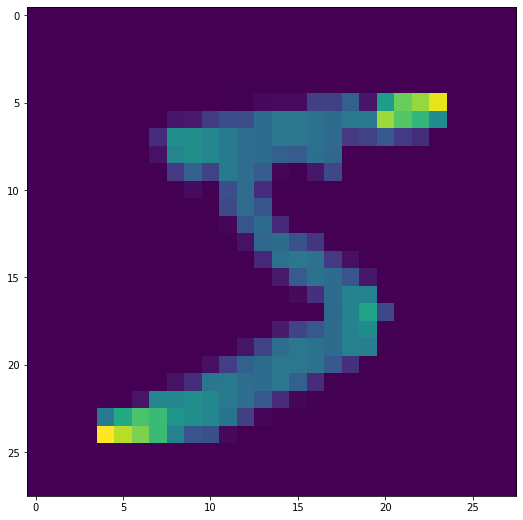

In [75]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[0])
plt.show()
#print(x_train[0])

In [76]:
model.save('isthisokay.model')


INFO:tensorflow:Assets written to: isthisokay.model\assets


In [77]:
new_model = tf.keras.models.load_model('isthisokay.model')

In [78]:
predictions = new_model.predict(x_test)         # problem here with lists

In [79]:
#print(predictions)
#print(np.argmax(predictions[0]))
#plt.imshow(x_test[0])
#plt.show()

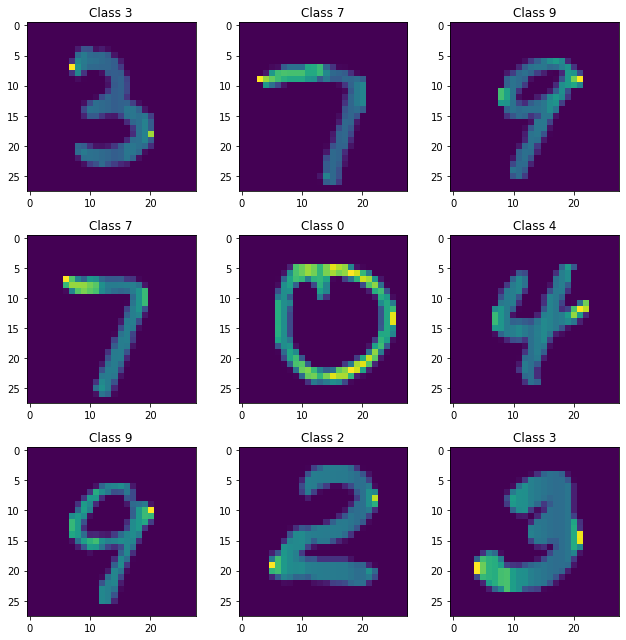

In [80]:
import random
plt.rcParams['figure.figsize'] = (9, 9)

for i in range(9):
    plt.subplot(3, 3, i+1)
    number = random.randint(0, len(x_test))
    plt.imshow(x_test[number], interpolation='none')
    plt.title("Class {}".format(np.argmax(predictions[number])))

plt.tight_layout()